# Prepare data for visualization

## What we want to display/use
- name??
- picture of molecule
- fingerprint
- smiles
- num of peaks

In [26]:
from rdkit import Chem
from rdkit.Chem import DataStructs
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

### What can you get from SMILES?

In [109]:
smiles = "[C@@H]1[C@@H](O)[C@H]2[C@@H](O)CCN2C[C@H]1O"
smiles2 = 'CC(=O)OC1=CC=CC=C1C(=O)O'
m = Chem.MolFromSmiles(smiles)
fp = Chem.RDKFingerprint(m, fpSize=2048)
arr = np.ndarray(20)
DataStructs.ConvertToNumpyArray(fp,arr)
print(arr)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1.

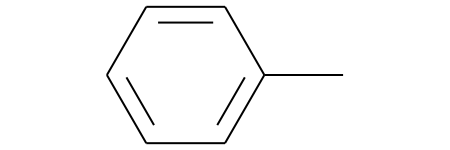

In [12]:
m

In [ ]:
%%time
# nekdy funguje, ale ne upe vzdycky teda...
import requests


CACTUS = "https://cactus.nci.nih.gov/chemical/structure/{0}/{1}"


def smiles_to_iupac(smiles):
    rep = "iupac_name"
    url = CACTUS.format(smiles, rep)
    response = requests.get(url)
    response.raise_for_status()
    return response.text


print(smiles_to_iupac('Cc1ncc(C(=O)c2ccc3ccccc3c2)c(C2CCCN(C(=O)C3CCN'))
# print(smiles_to_iupac('CC(=O)OC1=CC=CC=C1C(=O)O'))


### Create dataset from real data

In [59]:
from matchms.importing import load_from_msp
import pandas as pd

In [38]:
# importing data
real_spectra = load_from_msp("real_spektra/5_rcx_gc-orbitrap_metabolites_20210817.msp")
real_spectra = list(real_spectra)
print(f"We have {len(real_spectra)} real datapoints in total.")

We have 265 real datapoints in total.


In [39]:
real_spectra[0].metadata

{'name': 'Acetylserotonin_2TMS isomer 2',
 'scannumber': '-1',
 'retentiontime': '-1',
 'retentionindex': '2520.736',
 'precursormz': '362.18381',
 'precursortype': '[M]+',
 'ionmode': 'Positive',
 'spectrumtype': 'Centroid',
 'formula': 'C18H30N2O2Si2',
 'inchikey': 'BITJWWNGDAOCJT-UHFFFAOYSA-N',
 'inchi': '',
 'smiles': 'C[Si](C)(C)Oc1cc2c(cc1)n(cc2CC\\N=C(/C)O)[Si](C)(C)C',
 'authors': 'Price et al., RECETOX, Masaryk University (CZ)',
 'collisionenergy': '70',
 'instrument': 'Q Exactive GC Orbitrap GC-MS/MS',
 'instrumenttype': 'GC-EI-Orbitrap',
 'ionization': 'EI+',
 'license': 'CC BY-NC',
 'comment': '',
 'num peaks': '84'}

In [130]:
# create DF with interesting metainfo
fps = []
ms = []
for s in real_spectra:
    arr = np.ndarray(2048)
    m = Chem.MolFromSmiles(s.metadata["smiles"])
    fp = Chem.RDKFingerprint(m)
    DataStructs.ConvertToNumpyArray(fp, arr)
    if s.metadata["smiles"]:
        fps.append(arr)
        ms.append(m)
    
real_df = pd.DataFrame({"name": [n.metadata["name"] for n in real_spectra if n.metadata["smiles"]],
       "smiles": [n.metadata["smiles"] for n in real_spectra if n.metadata["smiles"]],
       "ionmode": [n.metadata["ionmode"] for n in real_spectra if n.metadata["smiles"]],
       "num_peaks": [n.metadata["num peaks"] for n in real_spectra if n.metadata["smiles"]],
       "fingerprint": fps,
       "molecules": ms})

In [132]:
display(real_df)

,name,smiles,ionmode,num_peaks,fingerprint,molecules
0,Acetylserotonin_2TMS isomer 2,C[Si](C)(C)Oc1cc2c(cc1)n(cc2CC\N=C(/C)O)[Si](C...,Positive,84,"[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, ...",<rdkit.Chem.rdchem.Mol object at 0x147678fea210>
1,Acetylserotonin_3TMS,O=C(N(CCC2=CN(C=1C=CC(O[Si](C)(C)C)=CC=12)[Si]...,Positive,20,"[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...",<rdkit.Chem.rdchem.Mol object at 0x147679864c10>
2,Acetylserotonin_2TMS isomer 1,C[Si](C)(C)Oc1cc2c(cc1)n(cc2CC\N=C(/C)O)[Si](C...,Positive,23,"[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, ...",<rdkit.Chem.rdchem.Mol object at 0x147679864bc0>
3,Methylnicotinamide,O=C(NC)C=1C=NC=CC=1,Positive,13,"[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",<rdkit.Chem.rdchem.Mol object at 0x147679864cb0>
4,Pipecolinic acid_2TMS,O=C(O[Si](C)(C)C)C1N(CCCC1)[Si](C)(C)C,Positive,12,"[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",<rdkit.Chem.rdchem.Mol object at 0x147679864c60>
...,...,...,...,...,...,...
252,2-Oxoadipic acid_2TMS isomer 2,O=C(O[Si](C)(C)C)C(=NOC)CCCC(=O)O[Si](C)(C)C,Positive,60,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",<rdkit.Chem.rdchem.Mol object at 0x147679904df0>
253,2-Oxoadipic acid_2TMS isomer 1,O=C(O[Si](C)(C)C)C(=NOC)CCCC(=O)O[Si](C)(C)C,Positive,67,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",<rdkit.Chem.rdchem.Mol object at 0x147679904e40>
254,Cytidine_4TMS,C[Si](C)(C)NC1=NC(=O)N(C=C1)C1OC(CO[Si](C)(C)C...,Positive,74,"[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...",<rdkit.Chem.rdchem.Mol object at 0x147679904e90>
255,Dehydroergosterol_1TMS,CC(C)C(C)/C=C/C(C)C1CCC2C3=CC=C4CC(CCC4(C)C3=C...,Positive,277,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...",<rdkit.Chem.rdchem.Mol object at 0x147679904f30>


In [125]:
real_df.to_csv("visualization_preparation_df.csv")